# Steady interface flow towards the coast
Mark Bakker, TU Delft, The Netherlands

In [48]:
# these are needed so that the notebook can also be run on Python 2
from __future__ import division, print_function
from pylab import *
%matplotlib notebook
from semi_interface import *
%matplotlib inline

### Interface flow towards the coast
Flow is confined below the land and semi-confined below the sea. The leaky sea bottom extends a distance $L_s$ below the sea. The freshwater is moving and the saltwater is at rest.
![](semi_coast_layout.png)
Input variables:
* `k`: hydraulic conductivity [m/d]
* `H`: aquifer thickness [m]
* `c`: resistance of leaky layer [d]
* `grad`: absolute value of head gradient towards coast upstream of interface toe
* `rhof`: density of fresh water [kg/m3]
* `rhos`: density of salt water [kg/m3]
* `Ls`: length of leaky sea bottom below sea (may also be `inf`) [m]
* `ztop`: elevation of top of aquifer with respect to datum [m]
* `sealevel`: elevation of sealevel with respect to datum [m]

### Case I of Bakker (2006)

toe of interface at: -211.68452838032238
tip of interface at: 153.2618864787106


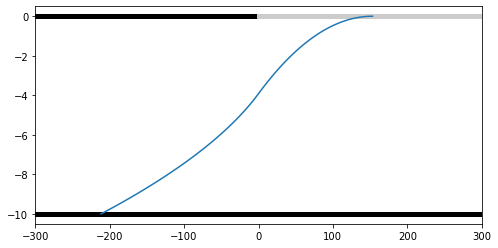

In [49]:
sc1 = SemiCoast(k=10, H=10, c=100, grad=0.0005, 
                rhof=1000, rhos=1025, Ls=inf, 
                ztop=0, sealevel=0)
print('toe of interface at:', sc1.toe())
print('tip of interface at:', sc1.tip())
sc1.plot(xmin=-300, xmax=300);

### Case II of Bakker (2006)

toe of interface at: 53.68364866819654
tip of interface at: 298.63262294651435


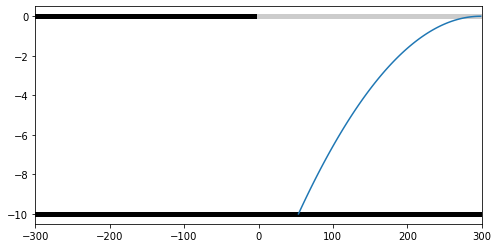

In [50]:
sc2 = SemiCoast(k=10, H=10, c=100, grad=0.00375, 
                rhof=1000, rhos=1025, Ls=inf, 
                ztop=0, sealevel=0)
print('toe of interface at:', sc2.toe())
print('tip of interface at:', sc2.tip())
sc2.plot(xmin=-300, xmax=300);

### Case III of Bakker (2006)

toe of interface at: [-212.41139369]
tip of interface at: 80.0


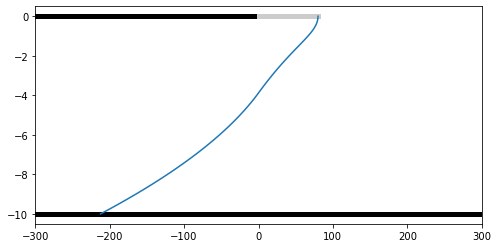

In [51]:
sc3 = SemiCoast(k=10, H=10, c=100, grad=0.0005, 
                rhof=1000, rhos=1025, Ls=80, 
                ztop=0, sealevel=0)
print('toe of interface at:', sc3.toe())
print('tip of interface at:', sc3.tip())
sc3.plot(xmin=-300, xmax=300);

### Case IV of Bakker (2006)

toe of interface at: 50.32434524587307
tip of interface at: 150.0


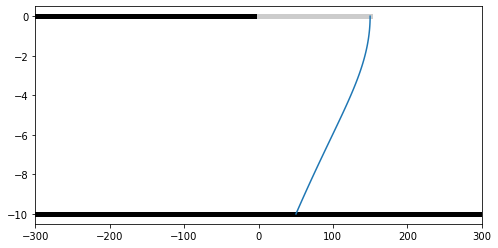

In [52]:
sc4 = SemiCoast(k=10, H=10, c=100, grad=0.00375, 
                rhof=1000, rhos=1025, Ls=150, 
                ztop=0, sealevel=0)
print('toe of interface at:', sc4.toe())
print('tip of interface at:', sc4.tip())
sc4.plot(xmin=-300, xmax=300);

### Specification of upstream head (onshore, so $x<0$)
Rather than specifying the gradient upstream of the toe, the head `h` is specified at some point `x` in the aquifer below the land (so `x` is negative).

toe of interface at: [-802.06010353]
tip of interface at: [5454.99274667]
computed gradient: [0.00144288]
D:\Workspace\hugm0001\anaconda\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


<Figure size 432x288 with 0 Axes>

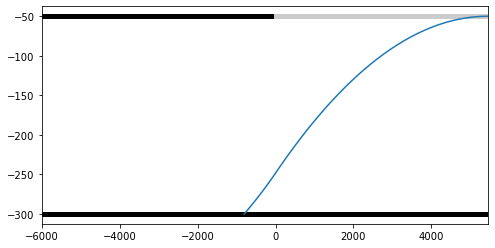

In [81]:
x=-6000
h=15

fig = plt.figure()

H1 = 50
kv = 0.01
c = H1/kv

schead = SemiCoastHead(k=5, H=250, c=c, x=x, h=h, 
                    rhof=1000, rhos=1025, Ls=1e6, 
                    ztop=-50, sealevel=0)
print('toe of interface at:', schead.toe())
print('tip of interface at:', schead.tip())
#print('location of h=1 (should be -1000)', schead.onshorex(h=1))
print('computed gradient:', schead.grad)
schead.plot(xmin=x,)

In [54]:
schead.doverlab

array([0.01472564])

### Figure for three different sealevels

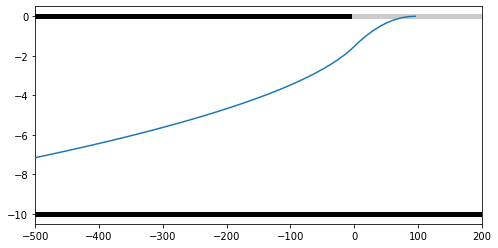

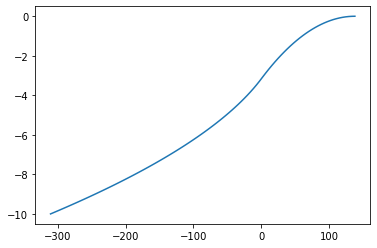

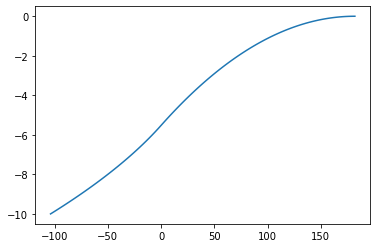

No handles with labels found to put in legend.


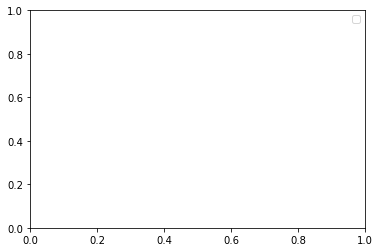

In [8]:
schead = SemiCoastHead(k=10, H=10, c=100, x=-1000, h=0.25, 
                       rhof=1000, rhos=1025, Ls=1000, 
                       ztop=0, sealevel=0, label='h=0.25')
schead.plot(xmin=-500, xmax=200)
schead = SemiCoastHead(k=10, H=10, c=100, x=-1000, h=0.5, 
                       rhof=1000, rhos=1025, Ls=1000, 
                       ztop=0, sealevel=0, label='h=0.5')
schead.plot(newfig=False);
schead = SemiCoastHead(k=10, H=10, c=100, x=-1000, h=1, 
                       rhof=1000, rhos=1025, Ls=1000, 
                       ztop=0, sealevel=0, label='h=1')
schead.plot(newfig=False);
legend(loc='best');

### Interface flow below an island
Consider steady Dupuit interface flow below a long island. The width of the island is $2W$. The infiltration on the island is uniform and equal to $N$. Flow is unconfined below the island and semi-confined below the sea. The leaky sea bottom extends a distance $L_s$ below the sea. The freshwater is moving and the saltwater is at rest. If the interface intersects the bottom of the aquifer, the toe of the interface is below the island. 
![](island_interface_semi.png)
Input variables:
* `k`: hydraulic conductivity [m/d]
* `D`: depth of aquifer bottom below sealevel [m]
* `c`: resistance of leaky layer [d]
* `rhof`: density of fresh water [kg/m3]
* `rhos`: density of salt water [kg/m3]
* `W`: half the width of the island [m]
* `N`: areal infiltration rate [m/d]
* `Nstreamlines`: number of streamlines to be drawn

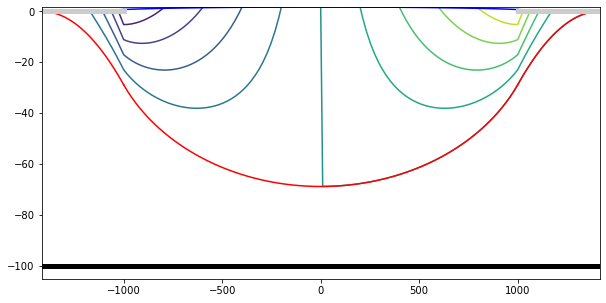

In [9]:
ii = IslandInterface(k=10, D=100, c=100, rhof=1000, rhos=1025, W=1000, N=0.001, Nstreamlines=10)
ii.plot()